To do: 1. use balance instead of biom table later
       2. make sure not overfitting (Cross Validation?)

In [1]:
import pandas as pd
from biom import load_table
import matplotlib.pyplot as plt
import numpy as np
from skbio import TreeNode
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

In [2]:
table = pd.read_table('../data/biomtable.txt', sep='\t', dtype=str, index_col='#OTU ID').transpose()
metadata = pd.read_table('../data/mapping_cleaned_MrOS.txt', sep='\t',dtype=str, index_col='#SampleID')

In [3]:
table.head()

#OTU ID,TACGTAGGTGGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGTGTAGGCGGGATATCAAGTCAGAAGTGAAAATTACGGGCTCAACTCGTAACCTGCTTTTGAAACTGACATTCTTGAGTGAAGTAGAGGCAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTGCTGGGCTTTTACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAA,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGACGGGTCCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGGACCTTGAGTGCGGCAGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTTGCTGGACCGTAACTGACGTTGATGCTCGAAAGTGCGGGTATCAAA,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAA,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAA,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAA,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTTGCTGGACTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAA,TACGGAGGATTCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTTTGATAAGTTAGAGGTGAAATTTCGGGGCTCAACCCTGAACGTGCCTCTAATACTGTTGAGCTAGAGAGTAGTTGCGGTAGGCGGAATGTATGGTGTAGCGGTGAAATGCTTAGAGATCATACAGAACACCGATTGCGAAGGCAGCTTACCAAACTATATCTGACGTTGAGGCACGAAAGCGTGGGGAGCAAA,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGATAACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAA,TACGGAGGATCCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCAGATAAGTTAGAGGTGAAATTCCGGTGCTTAACACCGGCGCTGCCTCTAATACTGTTTGACTAGAGAGTAGTTGCGGTAGGCGGAATGTATGGTGTAGCGGTGAAATGCTTAGAGATCATACAGAACACCGATTGCGAAGGCAGCTTACCAAGCTATATCTGACGTTGAGGCACGAAAGCGTGGGGAGCAAA,TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCATCACAAGTCAGAAGTGAAAGCCCGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTGGAGCTGGAGTGCAGGAGAGGCAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTGCTGGACTGTAACTGACACTGAGGCTCGAAAGCGTGGGGAGCAAA,...,AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGACCGGCAAGTTGGAAGTGAAAACTATGGGCTCAACCCATAAATTGCTTTCAAAACTGTTGGCCTTGAGTAGTGCAGAGGTAGGTGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGACCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCAAA,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGGTGGCAAGGCAAGTCAGATGTGAAAACCCGGGGCTCAACTCCGGGACTGCATTTGAAACTGTCTAGCTAGAGTGCAGGAGAGGTAAGTGGAATTCCTAGTGTAGCGGTGAAATGCATAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACTGTAACTGACACTGAGGCTCGAAAGCGTGGGGAGCAAA,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGACGCAAGTCTGAAGTGAAATACCCGGGCTCAACCTGGGAACTGCTTTGGAAACTGTGTTGCTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAAGAACACCAGTGGCGAAGGCGGCTTACTGGACAGTAACTGACGTTGAGGCTCGAAAACGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTAATCGGAATCACTGGGCGTAAAGCGCACGTAGGCGGCTTGGTAAGTCAGGGGTGAAATCCCACAGCCCAACTATGGAACTGCCTTTGATACTGCCAGGCTTGAGTACCGGAGAGGGTGGCGGAATTCCAGGTGTAGGAGTGAAATCCGTAGATATCTGGAGGAACACCGGTGGCGAAGGCGGCCACCTGGACGGTAACTGACGCTGAGGTGCGAAAGCGTGGGTAGCAAA,TACGTAGGTGGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGTGCGCAGGCGGGATTGCAAGTTGGATGTGAAATACCGGGGCTTAACCCCGGAGCTGCATCCAAAACTGTAGTTCTTGAGTGGAGTAGAGGTAAGCGGAATTCCGAGTGTAGCGGTGAAATGCGTAGATATTCGGAGGAACACCAGCGGCGAAGGCGGCTTACTGGGCTCTAACTGACGCTGAGGCACGAAAGCATGGGTAGCAAA,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTCTTGTAAGTCCGGTGTGAAAACCCGAGGCTCAACCTCGGGACTGCACTGGAAACTATGGGACTGGAGTGTCGGAGAGGTAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGACAACTGACGCTGAGGCTCGAAAGCG

In [4]:
from gneiss.util import match
table, metadata = match(table, metadata)

In [5]:
table.head(3)

#OTU ID,TACGTAGGTGGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGTGTAGGCGGGATATCAAGTCAGAAGTGAAAATTACGGGCTCAACTCGTAACCTGCTTTTGAAACTGACATTCTTGAGTGAAGTAGAGGCAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTGCTGGGCTTTTACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAA,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGACGGGTCCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGGACCTTGAGTGCGGCAGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTTGCTGGACCGTAACTGACGTTGATGCTCGAAAGTGCGGGTATCAAA,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAA,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAA,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAA,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTTGCTGGACTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAA,TACGGAGGATTCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTTTGATAAGTTAGAGGTGAAATTTCGGGGCTCAACCCTGAACGTGCCTCTAATACTGTTGAGCTAGAGAGTAGTTGCGGTAGGCGGAATGTATGGTGTAGCGGTGAAATGCTTAGAGATCATACAGAACACCGATTGCGAAGGCAGCTTACCAAACTATATCTGACGTTGAGGCACGAAAGCGTGGGGAGCAAA,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGATAACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAA,TACGGAGGATCCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCAGATAAGTTAGAGGTGAAATTCCGGTGCTTAACACCGGCGCTGCCTCTAATACTGTTTGACTAGAGAGTAGTTGCGGTAGGCGGAATGTATGGTGTAGCGGTGAAATGCTTAGAGATCATACAGAACACCGATTGCGAAGGCAGCTTACCAAGCTATATCTGACGTTGAGGCACGAAAGCGTGGGGAGCAAA,TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCATCACAAGTCAGAAGTGAAAGCCCGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTGGAGCTGGAGTGCAGGAGAGGCAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTGCTGGACTGTAACTGACACTGAGGCTCGAAAGCGTGGGGAGCAAA,...,AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGACCGGCAAGTTGGAAGTGAAAACTATGGGCTCAACCCATAAATTGCTTTCAAAACTGTTGGCCTTGAGTAGTGCAGAGGTAGGTGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGACCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCAAA,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGGTGGCAAGGCAAGTCAGATGTGAAAACCCGGGGCTCAACTCCGGGACTGCATTTGAAACTGTCTAGCTAGAGTGCAGGAGAGGTAAGTGGAATTCCTAGTGTAGCGGTGAAATGCATAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACTGTAACTGACACTGAGGCTCGAAAGCGTGGGGAGCAAA,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGACGCAAGTCTGAAGTGAAATACCCGGGCTCAACCTGGGAACTGCTTTGGAAACTGTGTTGCTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAAGAACACCAGTGGCGAAGGCGGCTTACTGGACAGTAACTGACGTTGAGGCTCGAAAACGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTAATCGGAATCACTGGGCGTAAAGCGCACGTAGGCGGCTTGGTAAGTCAGGGGTGAAATCCCACAGCCCAACTATGGAACTGCCTTTGATACTGCCAGGCTTGAGTACCGGAGAGGGTGGCGGAATTCCAGGTGTAGGAGTGAAATCCGTAGATATCTGGAGGAACACCGGTGGCGAAGGCGGCCACCTGGACGGTAACTGACGCTGAGGTGCGAAAGCGTGGGTAGCAAA,TACGTAGGTGGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGTGCGCAGGCGGGATTGCAAGTTGGATGTGAAATACCGGGGCTTAACCCCGGAGCTGCATCCAAAACTGTAGTTCTTGAGTGGAGTAGAGGTAAGCGGAATTCCGAGTGTAGCGGTGAAATGCGTAGATATTCGGAGGAACACCAGCGGCGAAGGCGGCTTACTGGGCTCTAACTGACGCTGAGGCACGAAAGCATGGGTAGCAAA,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTCTTGTAAGTCCGGTGTGAAAACCCGAGGCTCAACCTCGGGACTGCACTGGAAACTATGGGACTGGAGTGTCGGAGAGGTAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGACAACTGACGCTGAGGCTCGAAAGCG

In [6]:
metadata.head(3)

,BarcodeSequence,LinkerPrimerSequence,Experiment_Design_Description,Library_Construction_Protocol,Linker,Platform,Center_Name,Center_Project,Instrument_Model,Title,...,OHV1D2,OHV1D2CT,OHVD2CT,OHVDTOT,OHV1DTOT,OHSEAS,VDstatus,Description,ratio_activation,ratio_catabolism
#SampleID,,,,,,,,,,,,,,,,,,,,,
BI0532,ATCAGAACCTCG,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,NaN,0.06570000000000001,3:SUMMER,NaN,Orwoll.BI0532.BI,NaN,NaN
MN2475,ACTGGTTGAGTC,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,MN,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,17.2,0.042,2:SPRING,deficiency,Orwoll.MN2475.MN,0.0024418604651162794,0.13488372093023254
MN2344,CTGCTAACGCAA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,MN,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,35.3,0.07970000000000001,2:SPRING,sufficiency,Orwoll.MN2344.MN,0.002257790368271955,0.06912181303116148


In [7]:
print(table.shape, metadata.shape)

(599, 4727) (599, 66)


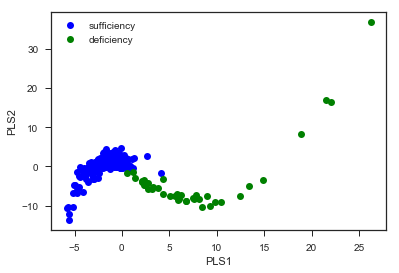

In [8]:
from sklearn.cross_decomposition import PLSRegression
from skbio.stats.composition import clr, centralize, multiplicative_replacement

rfc = PLSRegression(n_components=2)
rfc.fit(X=table.values, Y=metadata.VDstatus=='sufficiency')
midx = metadata.VDstatus=='sufficiency'
lidx = metadata.VDstatus=='deficiency'
plt.plot(rfc.x_scores_[midx, 0], rfc.x_scores_[midx, 1], 'ob', label='sufficiency')
plt.plot(rfc.x_scores_[lidx, 0], rfc.x_scores_[lidx, 1], 'og', label='deficiency')
plt.xlabel('PLS1')
plt.ylabel('PLS2')
plt.legend()

In [9]:
# QLCOMP (newly added covariate)
# rfc = PLSRegression(n_components=2)
# rfc.fit(X=table.values, Y=metadata.QLCOMP=='1:GOOD/EXCELLENT')
# midx = metadata.QLCOMP=='1:GOOD/EXCELLENT'
# lidx = metadata.QLCOMP=='0:PR/VPOOR/FAIR'
# plt.plot(rfc.x_scores_[midx, 0], rfc.x_scores_[midx, 1], 'ob', label='1:GOOD/EXCELLENT')
# plt.plot(rfc.x_scores_[lidx, 0], rfc.x_scores_[lidx, 1], 'og', label='0:PR/VPOOR/FAIR')
# plt.xlabel('PLS1')
# plt.ylabel('PLS2')
# plt.legend()

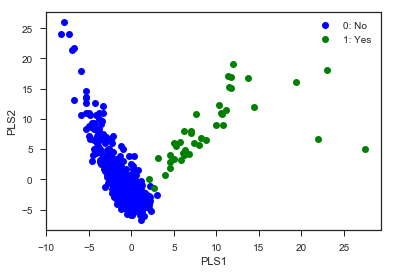

In [10]:
rfc = PLSRegression(n_components=2)
rfc.fit(X=table.values, Y=metadata.M1ANTIB=='0: No')
midx = metadata.M1ANTIB=='0: No'
lidx = metadata.M1ANTIB=='1: Yes'
plt.plot(rfc.x_scores_[midx, 0], rfc.x_scores_[midx, 1], 'ob', label='0: No')
plt.plot(rfc.x_scores_[lidx, 0], rfc.x_scores_[lidx, 1], 'og', label='1: Yes')
plt.xlabel('PLS1')
plt.ylabel('PLS2')
plt.legend()

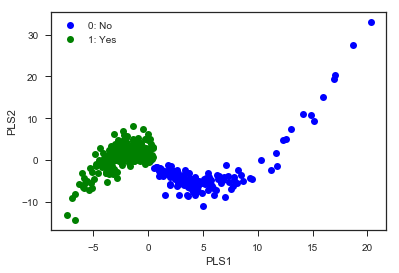

In [11]:
rfc = PLSRegression(n_components=2)
rfc.fit(X=table.values, Y=metadata.M1VITMND=='1: Yes')
midx = metadata.M1VITMND=='0: No'
lidx = metadata.M1VITMND=='1: Yes'
plt.plot(rfc.x_scores_[midx, 0], rfc.x_scores_[midx, 1], 'ob', label='0: No')
plt.plot(rfc.x_scores_[lidx, 0], rfc.x_scores_[lidx, 1], 'og', label='1: Yes')
plt.xlabel('PLS1')
plt.ylabel('PLS2')
plt.legend()

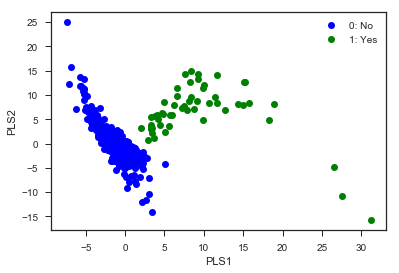

In [12]:
rfc = PLSRegression(n_components=2)
rfc.fit(X=table.values, Y=metadata.M1ADEPR=='1: Yes')
midx = metadata.M1ADEPR=='0: No'
lidx = metadata.M1ADEPR=='1: Yes'
plt.plot(rfc.x_scores_[midx, 0], rfc.x_scores_[midx, 1], 'ob', label='0: No')
plt.plot(rfc.x_scores_[lidx, 0], rfc.x_scores_[lidx, 1], 'og', label='1: Yes')
plt.xlabel('PLS1')
plt.ylabel('PLS2')
plt.legend()

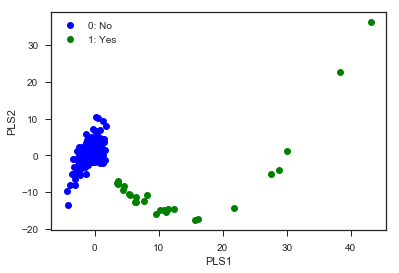

In [13]:
rfc = PLSRegression(n_components=2)
rfc.fit(X=table.values, Y=metadata.M1PROBI=='1: Yes')
midx = metadata.M1PROBI=='0: No'
lidx = metadata.M1PROBI=='1: Yes'
plt.plot(rfc.x_scores_[midx, 0], rfc.x_scores_[midx, 1], 'ob', label='0: No')
plt.plot(rfc.x_scores_[lidx, 0], rfc.x_scores_[lidx, 1], 'og', label='1: Yes')
plt.xlabel('PLS1')
plt.ylabel('PLS2')
plt.legend()